# WILDFIRE AI

Задача:
Необходимо по информации о точке температурной аномалии, классифицировать тип пожара (по классификации МЧС). Решение должно быть реализовано в виде программы, которая принимает на вход CSV таблицу с точками (координаты latitude, longitude и дата получения точки date). На выход необходимо формировать таблицу с вероятностями по каждому из 11 классов (колонки fire_1_prob, fire_11_prob).

Признаки <a href="https://wildfire.sberbank.ai/get_train_data">wildfires_train.csv</a>:
- point_id
- date - [2012-01-01, 2019-04-30]
- latitude - широта
- longitude - долгота
- fire_type - [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]
- fire_type_name - ['технологический процесс', 'техногенный пожар', 'горение мусора', 'сжигание порубочных остатков', 'сжигание мусора', 'неконтролируемый пал', 'торфяной пожар', 'лесной пожар', 'природный пожар', 'контролируемый пал', '	не подтверждено'] 

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
wildfires_train = pd.read_csv('data/wildfires_train.csv')

In [3]:
wildfires_train.dtypes

point_id            int64
date               object
latitude          float64
longitude         float64
fire_type           int64
fire_type_name     object
dtype: object

In [4]:
wildfires_train.head(5)

point_id        date   latitude   longitude  fire_type  \
0         0  2012-01-01  42.913439  133.887370          4   
1         1  2012-01-01  43.378618  131.772265          3   
2         2  2012-01-01  42.634134  130.479116          4   
3         3  2012-01-02  43.108370  132.001058         11   
4         4  2012-01-02  42.890825  131.337416          4   

                 fire_type_name  
0  сжигание порубочных остатков  
1                горение мусора  
2  сжигание порубочных остатков  
3               не подтверждено  
4  сжигание порубочных остатков

In [5]:
wildfires_train.describe(include='all')

point_id        date       latitude      longitude  \
count   174871.000000      174871  174871.000000  174871.000000   
unique            NaN        2332            NaN            NaN   
top               NaN  2014-04-19            NaN            NaN   
freq              NaN         808            NaN            NaN   
mean     87435.000000         NaN      52.688138      87.146319   
std      50481.053799         NaN       4.946597      36.378957   
min          0.000000         NaN      37.400210      15.494654   
25%      43717.500000         NaN      50.079648      47.230059   
50%      87435.000000         NaN      52.946758      90.510410   
75%     131152.500000         NaN      55.413424     119.506356   
max     174870.000000         NaN      71.957835     177.766888   

            fire_type        fire_type_name  
count   174871.000000                174871  
unique            NaN                    11  
top               NaN  неконтролируемый пал  
freq              NaN                 47064  
mean         7.988626                   NaN  
std          2.445743                   NaN  
min          1.000000                   NaN  
25%          6.000000                   NaN  
50%          9.000000                   NaN  
75%         10.000000                   NaN  
max         11.000000                   NaN

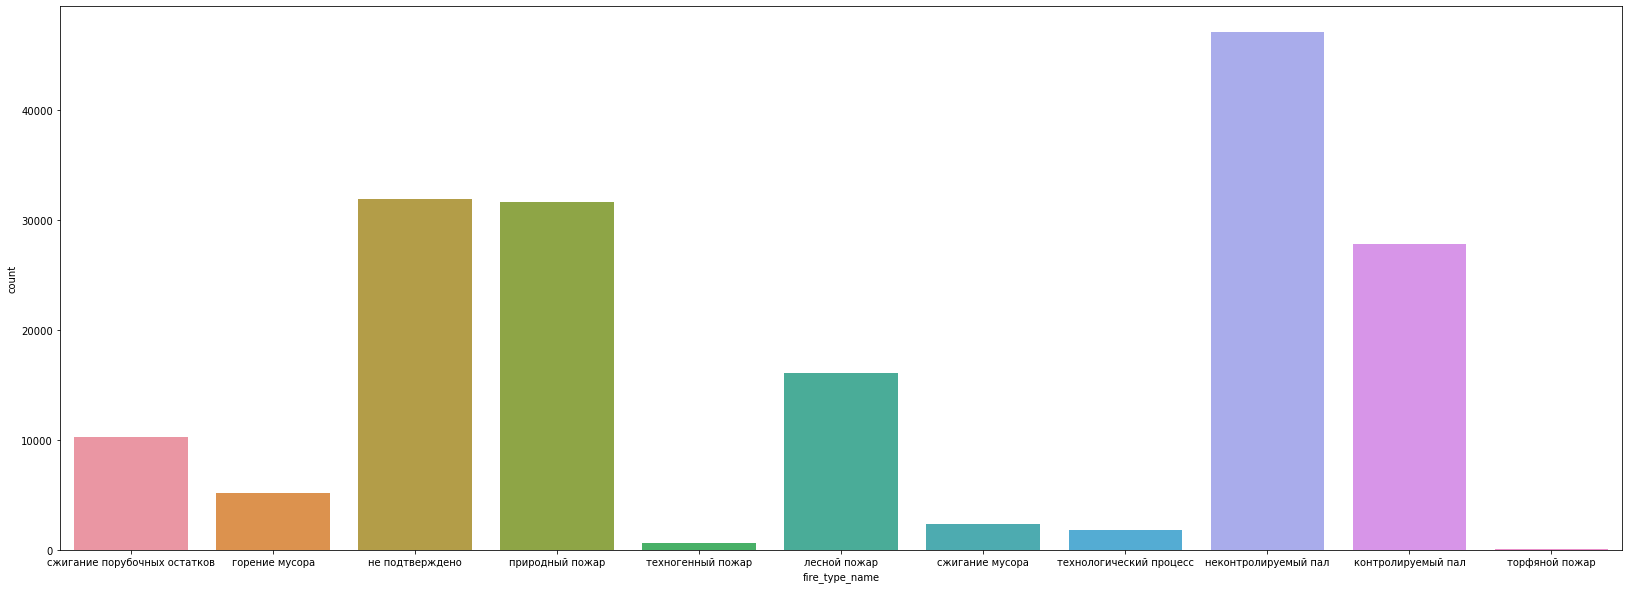

In [6]:
fig, ax = plt.subplots(figsize=(28, 10))

sns.countplot(wildfires_train['fire_type_name']);

In [ ]:
##############################################################
# If you have problem with PROJ_LIB and Basemap
import os
os.environ['PROJ_LIB'] = '/Users/user_name/anaconda3/share/proj'
##############################################################

In [7]:
from mpl_toolkits.basemap import Basemap

In [8]:
# http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=11
colors_for_fire = {
    'сжигание порубочных остатков': '#a6cee3',
    'горение мусора': '#1f78b4',
    'не подтверждено': '#b2df8a',
    'природный пожар': '#33a02c',
    'техногенный пожар': '#fb9a99',
    'лесной пожар': '#e31a1c',
    'сжигание мусора': '#fdbf6f',
    'технологический процесс': '#ff7f00',
    'неконтролируемый пал': '#cab2d6',
    'контролируемый пал': '#6a3d9a',
    'торфяной пожар': '#ffff99',
}

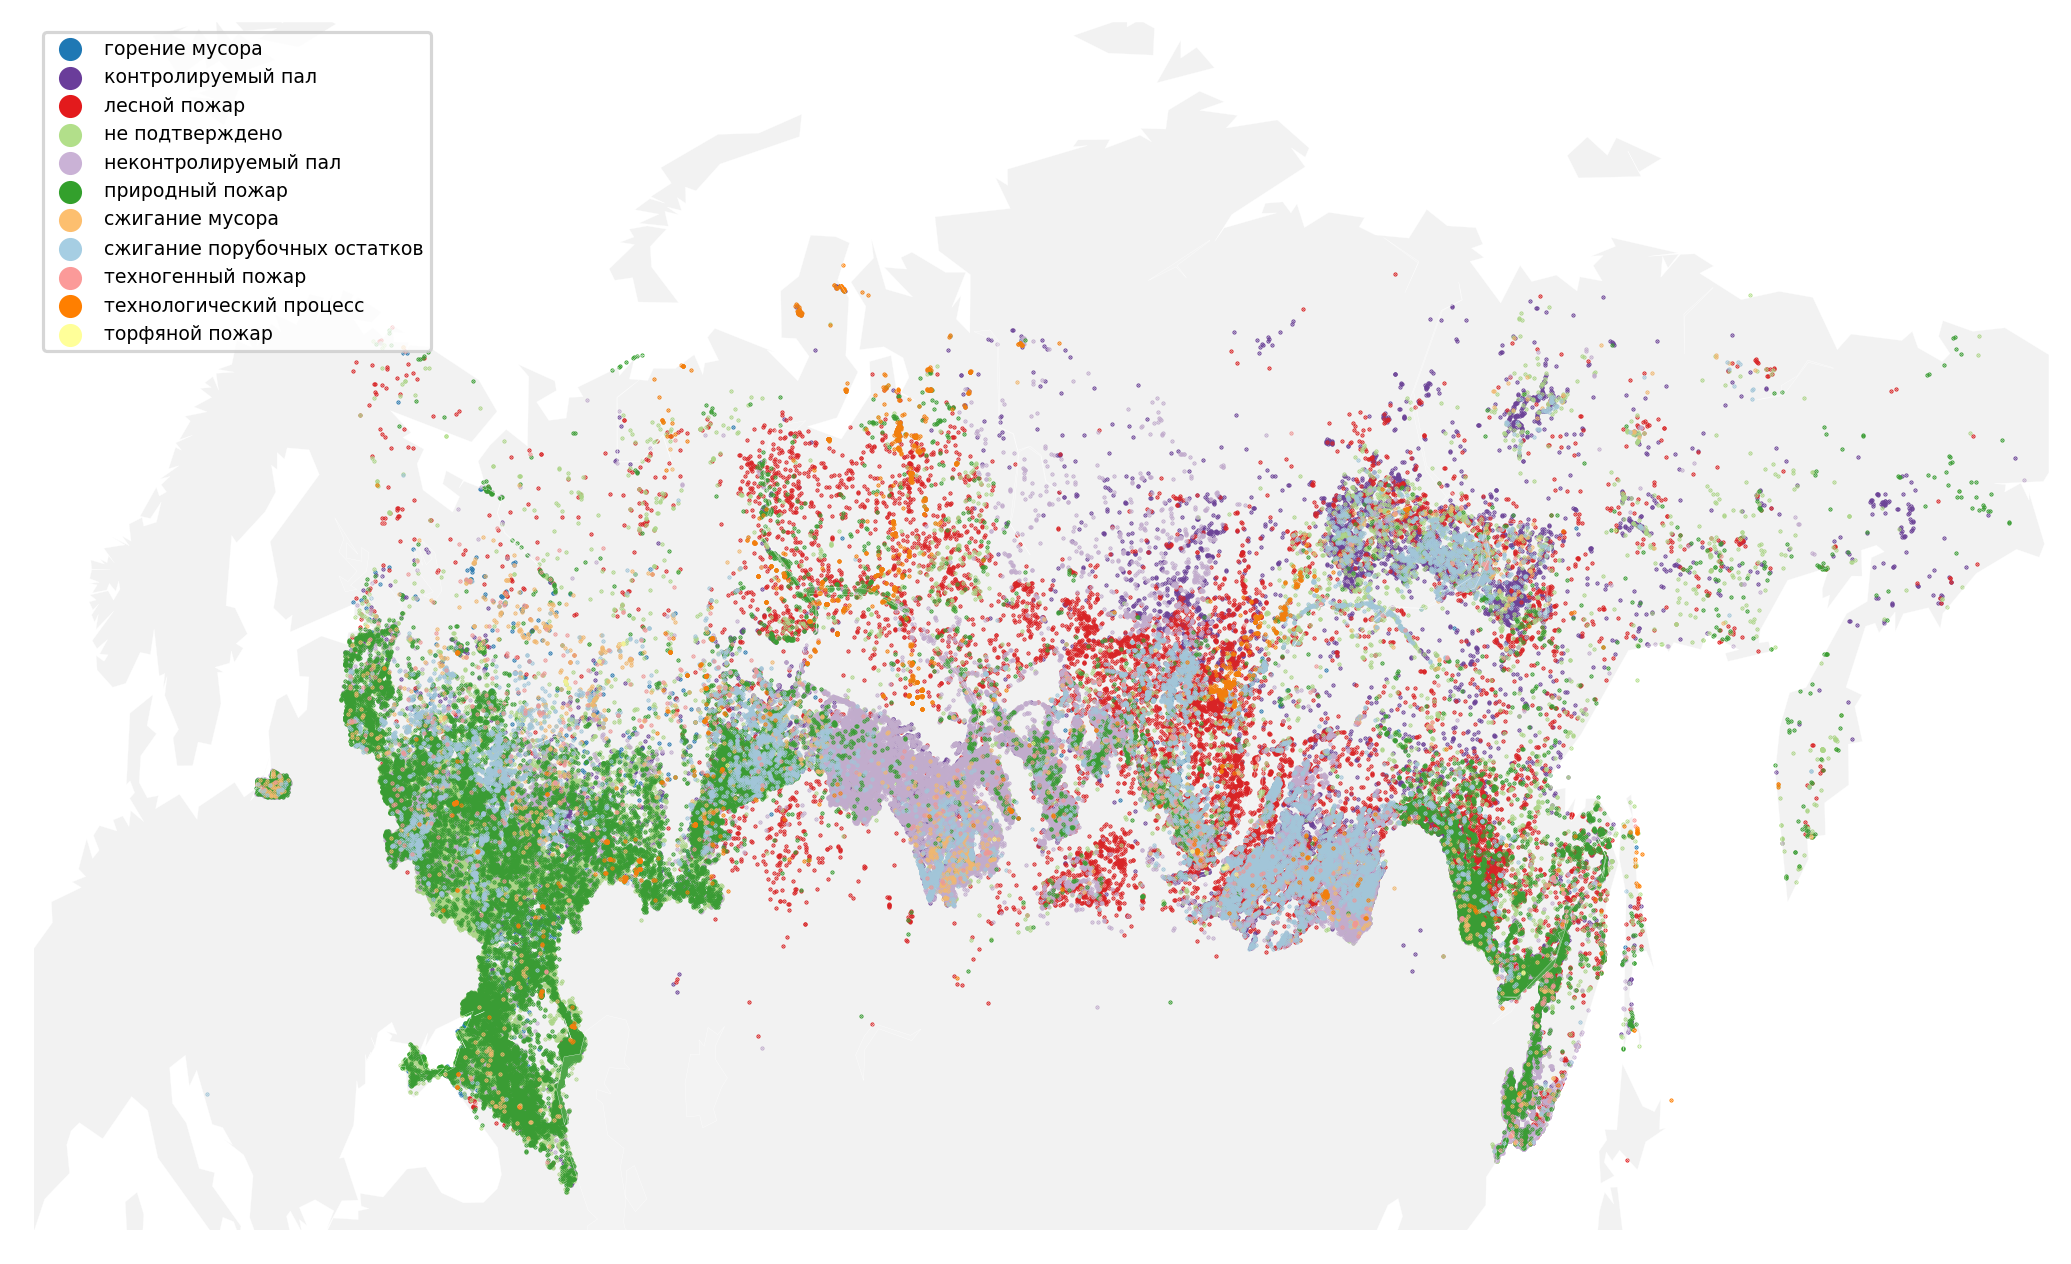

In [9]:
# https://python-graph-gallery.com/315-a-world-map-of-surf-tweets/

df_subsample = wildfires_train

my_dpi=227
fig = plt.figure(figsize=(2600/my_dpi, 1600/my_dpi), dpi=my_dpi)

data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
m=Basemap(llcrnrlon=0, llcrnrlat=40,urcrnrlon=180,urcrnrlat=80, fix_aspect=False)
m.drawmapboundary(fill_color='#FFFFFF', linewidth=0)
m.fillcontinents(color='grey', alpha=0.1)
m.drawcoastlines(linewidth=0.1, color="white")
 

for fire_type in np.unique(df_subsample['fire_type_name']):
    df_subsample_i = df_subsample[df_subsample['fire_type_name'] == fire_type]
    m.scatter(df_subsample_i['longitude'], df_subsample_i['latitude'], s=0.1, alpha=1.0,
              color=colors_for_fire[fire_type], label=fire_type)

plt.legend(loc=2, prop={'size': 6}, markerscale=20.0);

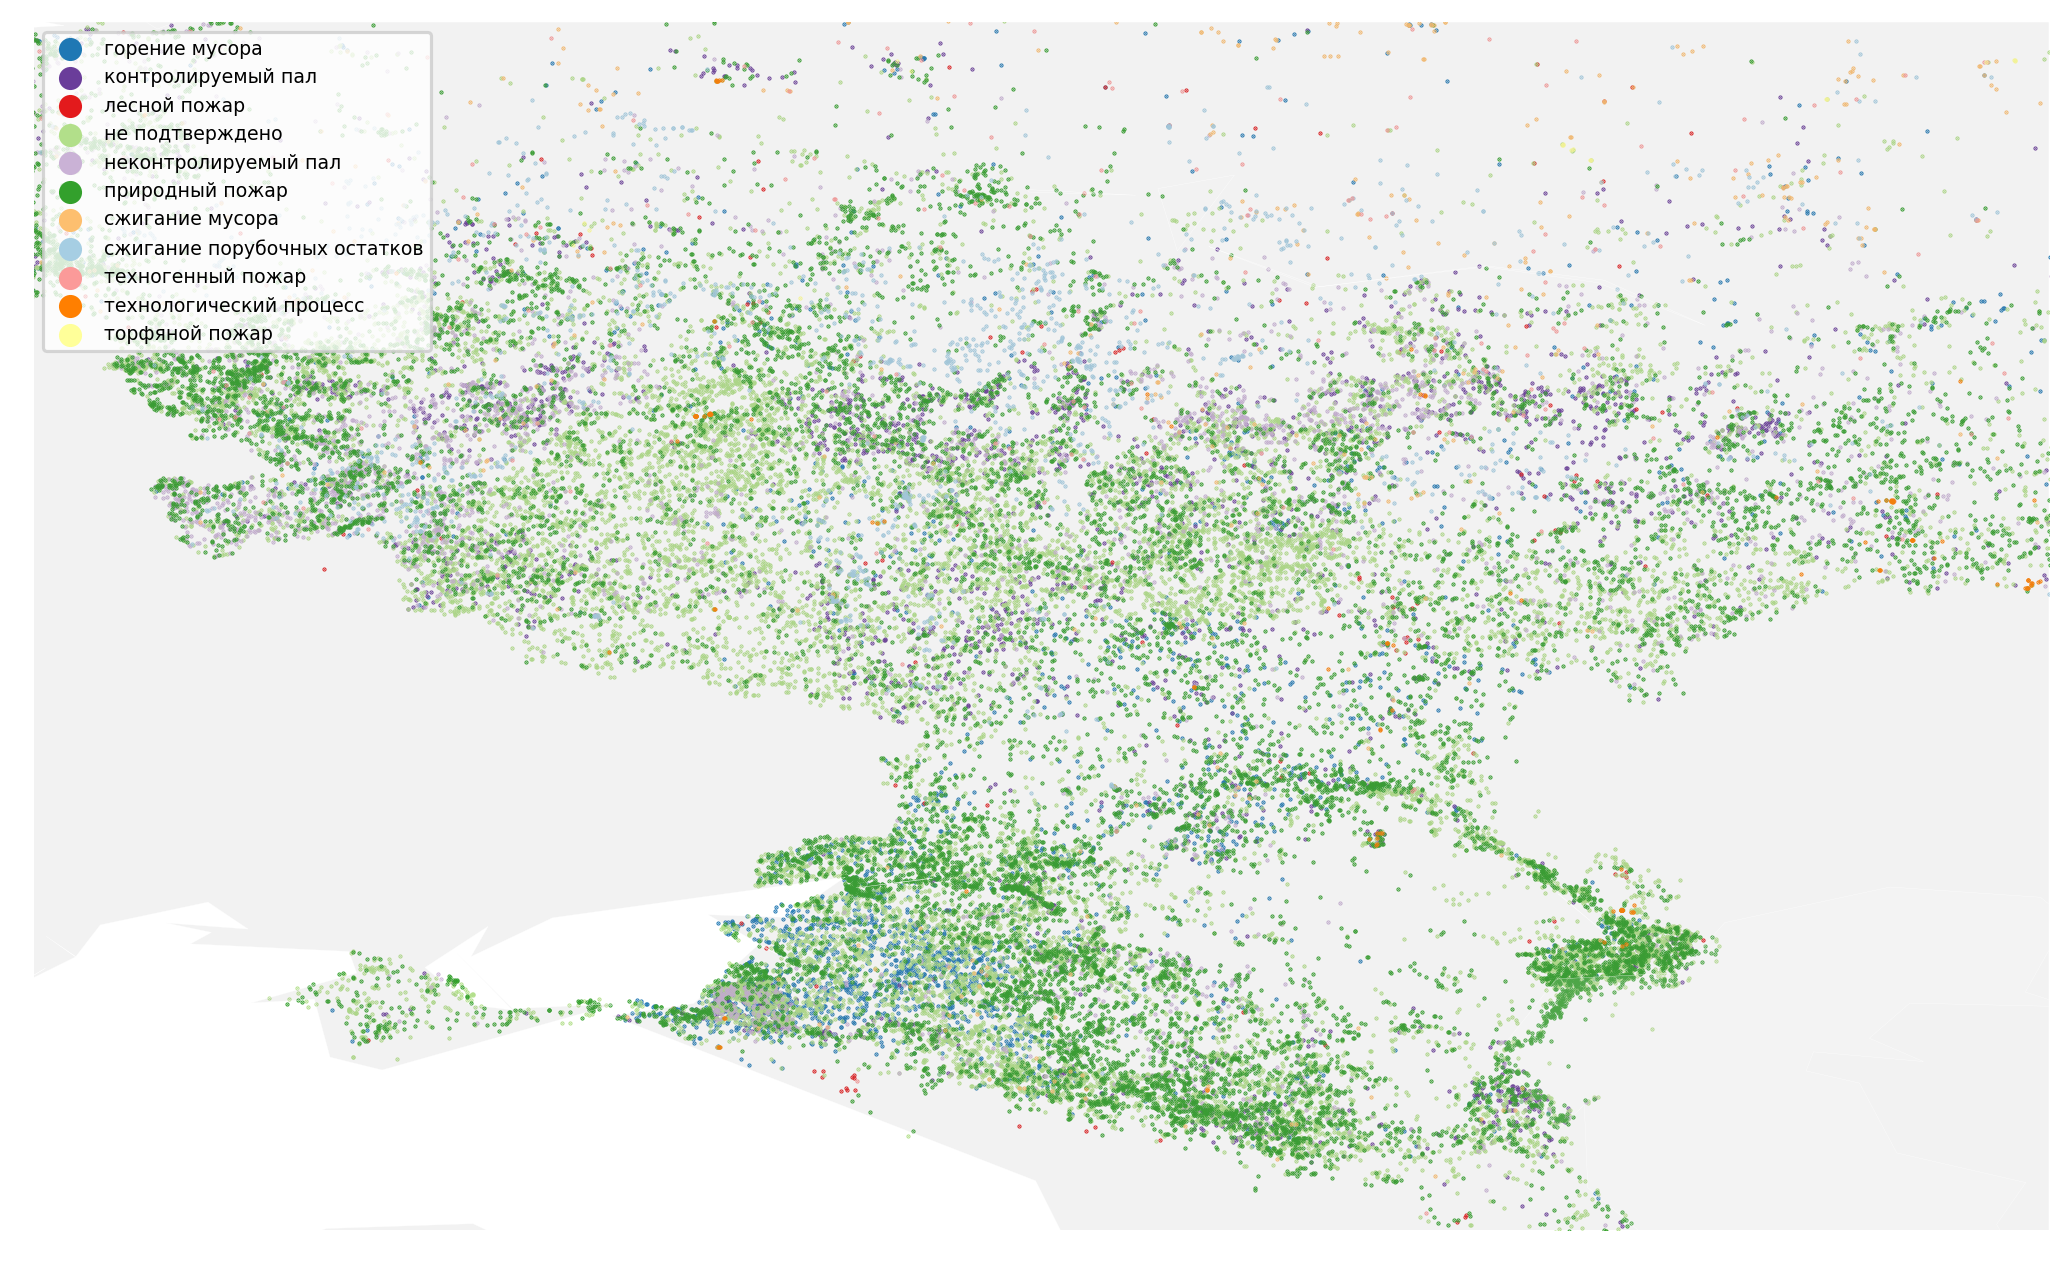

In [10]:
my_dpi=227
fig = plt.figure(figsize=(2600/my_dpi, 1600/my_dpi), dpi=my_dpi)

m=Basemap(llcrnrlon=30, llcrnrlat=42,urcrnrlon=53,urcrnrlat=60, fix_aspect=False)
m.drawmapboundary(fill_color='#FFFFFF', linewidth=0)
m.fillcontinents(color='grey', alpha=0.1)
m.drawcoastlines(linewidth=0.1, color="white")
 

for fire_type in np.unique(df_subsample['fire_type_name']):
    df_subsample_i = df_subsample[df_subsample['fire_type_name'] == fire_type]
    m.scatter(df_subsample_i['longitude'], df_subsample_i['latitude'], s=0.1, alpha=1.0,
              color=colors_for_fire[fire_type], label=fire_type)

plt.legend(loc=2, prop={'size': 6}, markerscale=20.0);

# NCEP Reanalysis 2 - исторические погодные данные

<a href="https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.html">description</a> & <a href="https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep/catalog.html">data</a>

* general:
    - lat - широта
    - lon - долгота
    - Daily mean values 1979/12/01 to present.


* air - Air temperature (температура воздуха)

* rhum - Relative Humidity (относительная влажность)
 
* uwnd - Zonal Wind	(зональный ветер)


<a href="https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep/air.2018.nc">air.2018.nc</a>

<a href="https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep/rhum.2018.nc">rhum.2018.nc</a>

<a href="https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep/uwnd.2018.nc">uwnd.2018.nc</a>

In [11]:
import xarray
import requests
from tqdm import tqdm_notebook as tqdm

In [12]:
ncep_data = []
year = 2018
for var in ('air', 'uwnd', 'rhum'):
    dataset_filename = 'data/ncep/{}.{}.nc'.format(var, year)
    ncep_data.append(xarray.open_dataset(dataset_filename))
ncep_data = xarray.merge(ncep_data)

In [13]:
# point.rolling(time=n).mean() - это среднее значение за n дней
# Соответсвенно 1w, 2w, 3w - это недели

def extract_features(row):
    point = ncep_data.sel(
        lon=row['longitude'],
        lat=row['latitude'],
        level=1000,
        method='nearest',
    )

    p1w = point.rolling(time=7).mean()
    p2w = point.rolling(time=14).mean()
    p3w = point.rolling(time=21).mean()
    
    date = row['date']
    v = point.sel(time=date)
    v1w = p1w.sel(time=date)
    v2w = p2w.sel(time=date)
    v3w = p3w.sel(time=date)
    
    return {
        'fire_type': row['fire_type'],
        'fire_type_name': row['fire_type_name'],
        'date': row['date'], 
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'temperature': v.air.values.item(0),
        'humidity': v.rhum.values.item(0),
        'uwind': v.uwnd.values.item(0),
        't1w': v1w.air.values.item(0),
        't2w': v2w.air.values.item(0),
        't3w': v3w.air.values.item(0),
        'h1w': v1w.rhum.values.item(0),
        'h2w': v2w.rhum.values.item(0),
        'h3w': v3w.rhum.values.item(0)
    }

In [14]:
df_features = []

df_subsample = wildfires_train.query('(date > "2018") & (date < "2019")').sample(n=2000)
for i, row in tqdm(df_subsample.iterrows(), total=df_subsample.shape[0]):
    features = extract_features(row)
    df_features.append(features)
df_features = pd.DataFrame(df_features)

In [15]:
df_features.head(5)

fire_type        fire_type_name        date   latitude   longitude  \
0          6  неконтролируемый пал  2018-10-19  48.030471  131.537799   
1          8          лесной пожар  2018-06-03  52.312818  132.056792   
2          6  неконтролируемый пал  2018-03-25  50.442440  117.860283   
3         11       не подтверждено  2018-07-24  55.789295  157.199535   
4         11       не подтверждено  2018-05-14  52.181313   59.161128   

   temperature   humidity     uwind         t1w         t2w         t3w  \
0   281.820007  48.910004  4.380005  279.984253  281.033630  282.768646   
1   297.599976  57.910004  1.209991  295.254364  291.980774  290.791016   
2   282.429993  68.330002 -0.900009  275.862793  271.471313  266.652771   
3   293.570007  80.589996 -1.460007  293.548523  293.527039  291.486298   
4   288.270020  38.809998  5.250000  286.479980  285.695068  284.776642   

         h1w        h2w        h3w  
0  57.382858  57.812897  58.840008  
1  41.885689  49.077835  48.827621  
2  73.364288  75.389236  78.115692  
3  73.099930  70.772186  73.189987  
4  51.717144  50.902119  53.350937

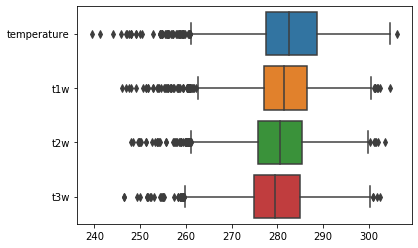

In [16]:
sns.boxplot(orient="h", data=df_features[['temperature', 't1w', 't2w', 't3w']]);

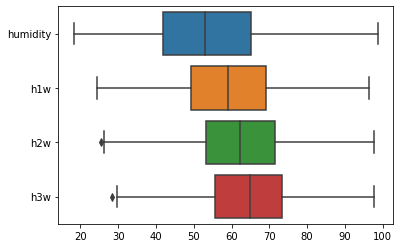

In [17]:
sns.boxplot(data=df_features[['humidity', 'h1w', 'h2w', 'h3w']], orient="h");

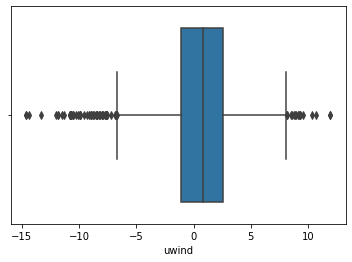

In [18]:
sns.boxplot(y='uwind', data=df_features, orient="h");

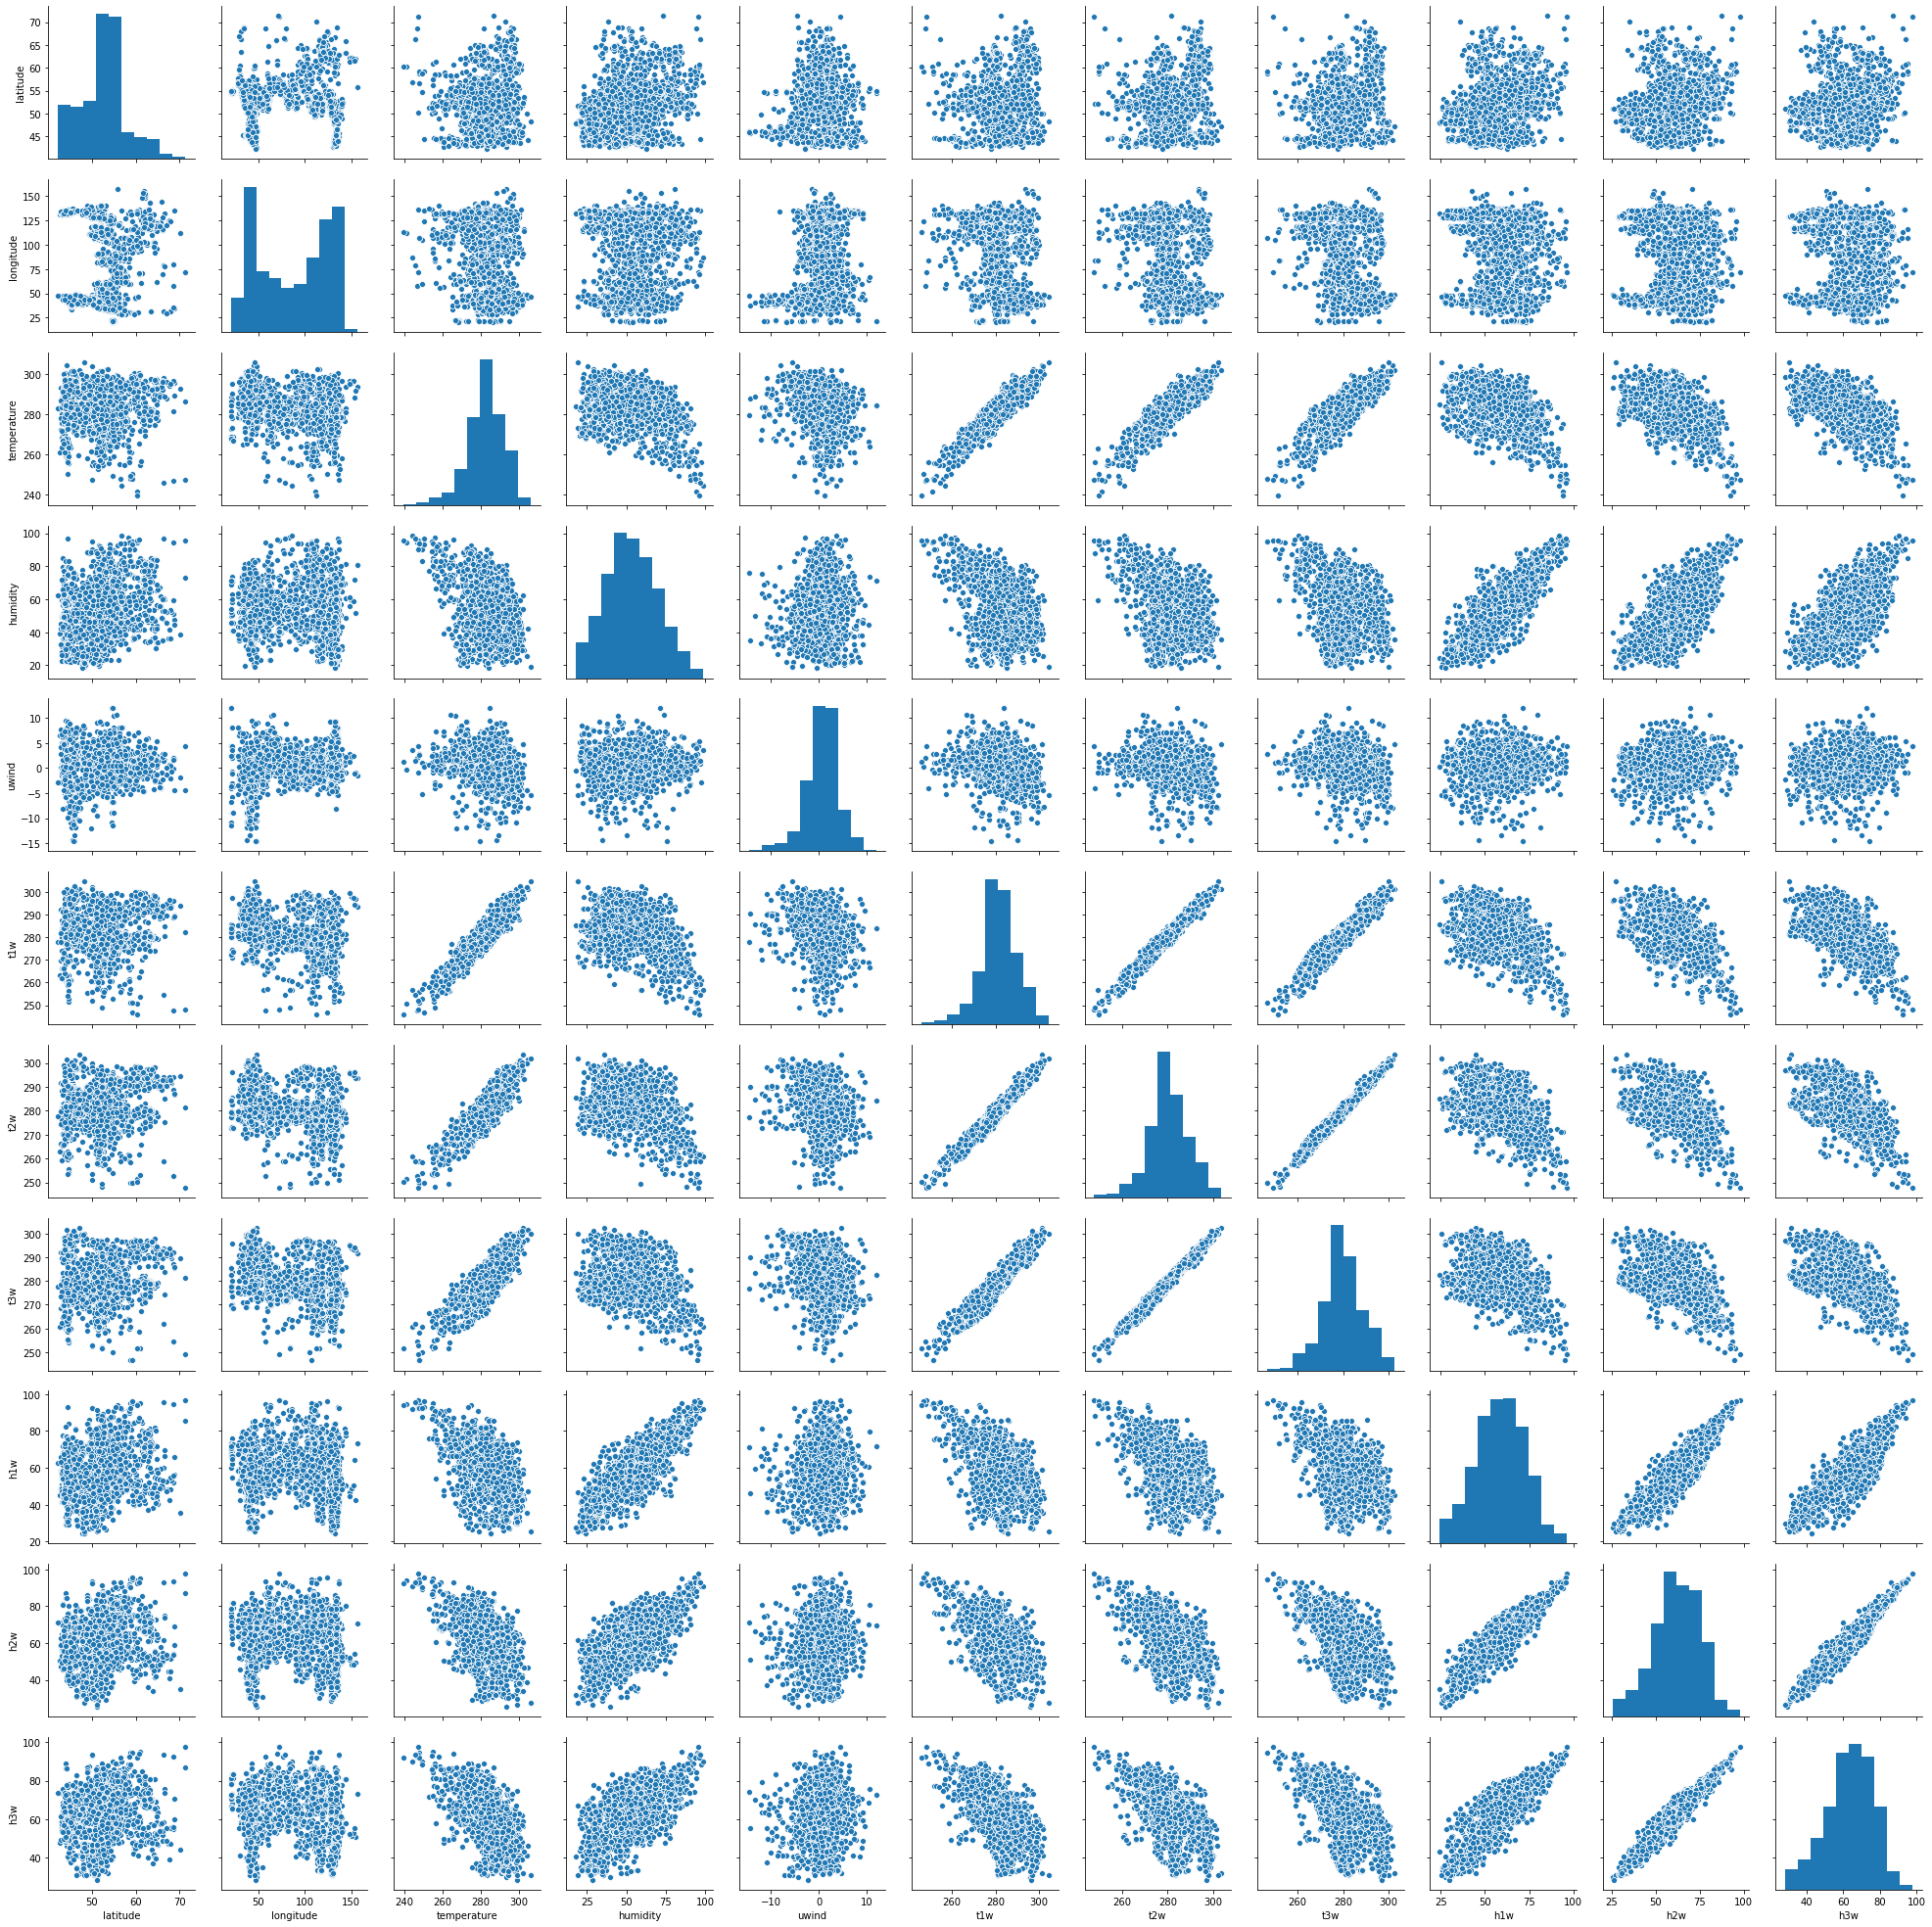

In [19]:
cols = ['latitude', 'longitude', 'temperature', 'humidity', 'uwind', 't1w', 't2w', 't3w', 'h1w', 'h2w', 'h3w']
sns_plot = sns.pairplot(df_features[cols])

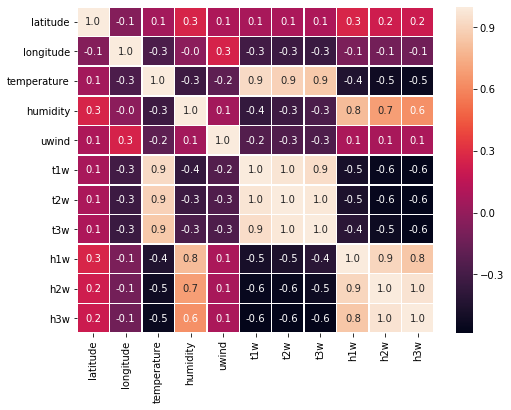

In [20]:
fig, ax = plt.subplots(figsize=(8,6))  
sns.heatmap(df_features[cols].corr(), ax=ax, linewidths=.5, annot=True, fmt='.1f')
ax.set_ylim(11.0, 0);

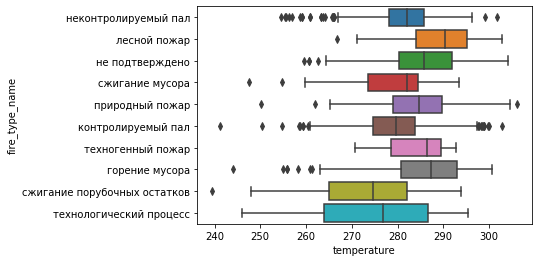

In [21]:
sns.boxplot(orient="h", x='temperature', y='fire_type_name', data=df_features);

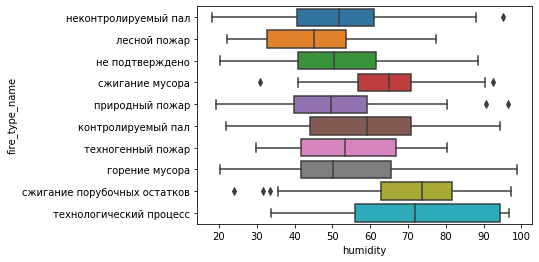

In [22]:
sns.boxplot(orient="h", x='humidity', y='fire_type_name', data=df_features);

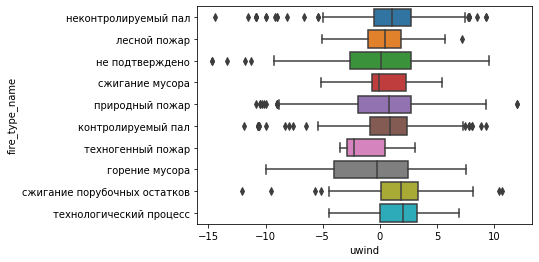

In [23]:
sns.boxplot(orient="h", x='uwind', y='fire_type_name', data=df_features);

In [24]:
from sklearn import preprocessing
df_features['temperature_scaled'] = preprocessing.scale(df_features[['temperature']])
df_features['humidity_scaled'] = preprocessing.scale(df_features[['humidity']])
df_features['uwind_scaled'] = preprocessing.scale(df_features[['uwind']])

In [25]:
means = df_features.groupby(['fire_type_name'])[['temperature_scaled', 'humidity_scaled', 'uwind_scaled']].mean()

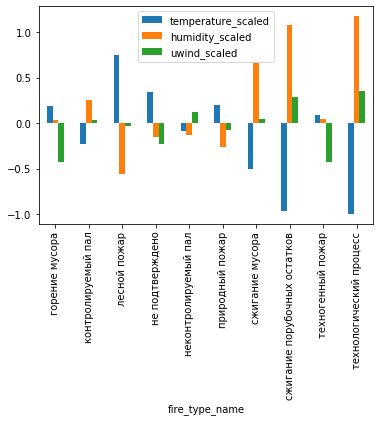

In [26]:
ax = means.plot(kind = 'bar')